In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
base_path = Path('/content/drive/MyDrive/data')

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

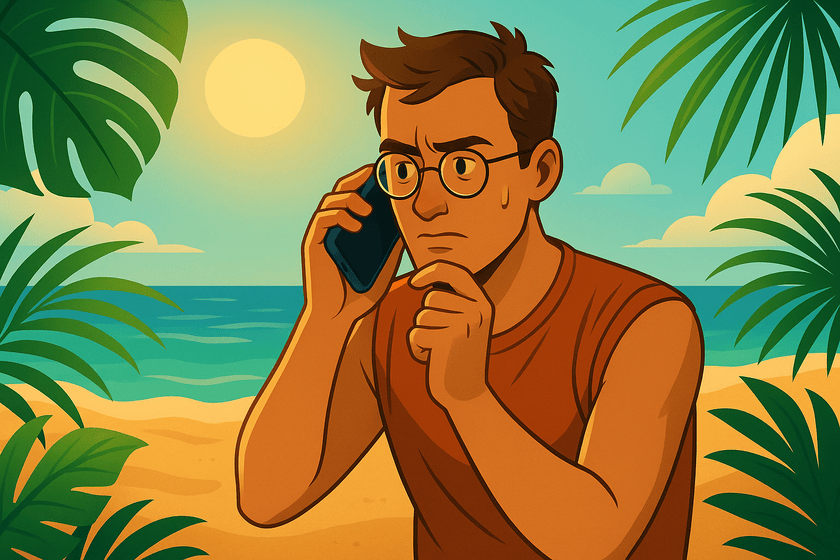

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


# Rozwiązanie zadania

1. Wczytanie danych

In [69]:
# Wykresy
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (8, 5)

# Dane
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')
df = titanic_df.copy() # Kopia jest po to, żeby nie modyfikować oryginalnego pliku

# Podstawowe informacje
print("Rozmiar zbioru:", df.shape)
display(df.head())
df.info()
display(df.describe(include='all'))

Rozmiar zbioru: (891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,793.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,33.123938,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,51.578312,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.925000,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


2. Analiza braków danych

,Missing,Percent
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,98,10.998878
Cabin,687,77.104377


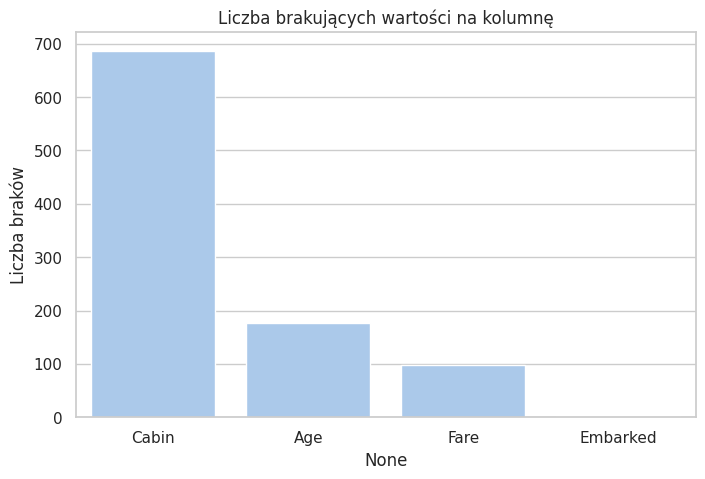

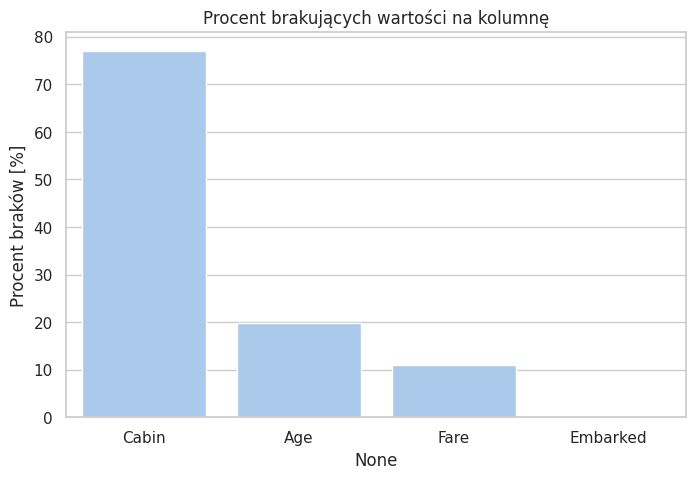

In [70]:
# Liczba i procent braków
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_percent})
display(missing_df)

# Wizualizacja braków
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
sns.barplot(x=missing.index, y=missing.values)
plt.ylabel('Liczba braków')
plt.title('Liczba brakujących wartości na kolumnę')
plt.show()


missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_percent = missing_percent[missing_percent > 0]
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.ylabel('Procent braków [%]')
plt.title('Procent brakujących wartości na kolumnę')
plt.show()


# Uzupełnianie braków
# Podstawianie najczęściej występującą wartość
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Uzupełnienie brakujące wartości medianą
df['Age'] = df.groupby(['Sex', 'Pclass'], observed=True)['Age'].transform(lambda x: x.fillna(x.median()))

# Cabin – zamiana na cechę binarną
df['HasCabin'] = df['Cabin'].notnull().astype(int)

# Usuwanie wierszy
df.dropna(how='all', inplace=True)

3. Poprawa typów danych

In [71]:
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Survived'] = df['Survived'].astype(int)

4. Analiza rozkładów

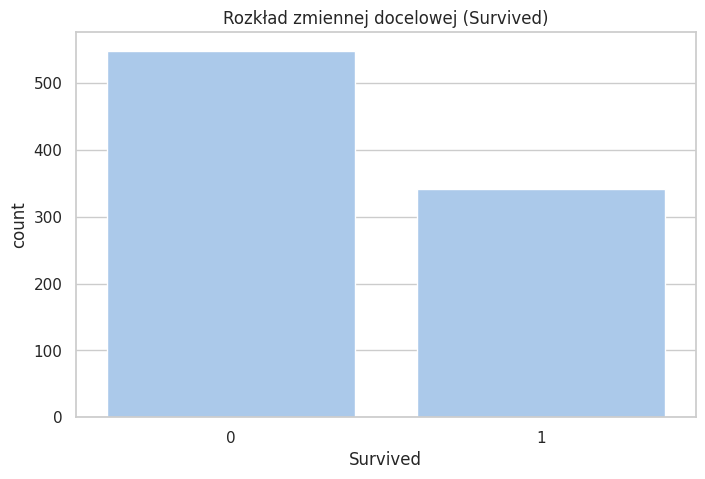

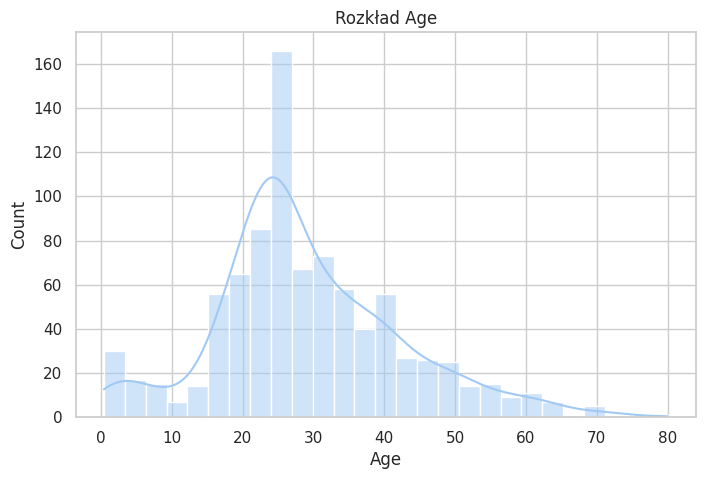

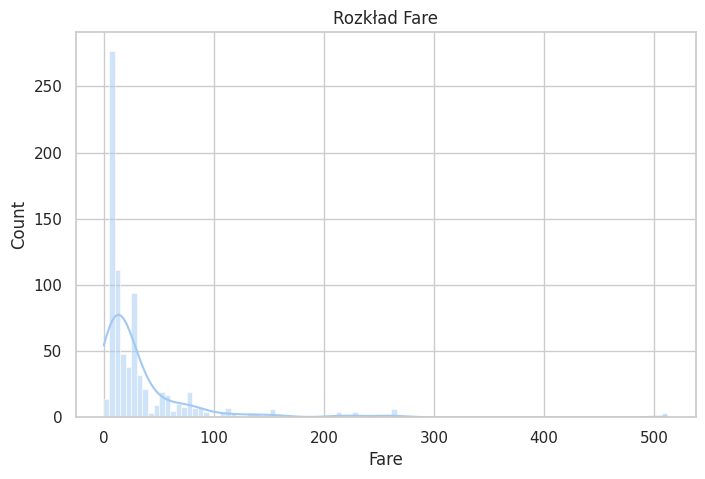

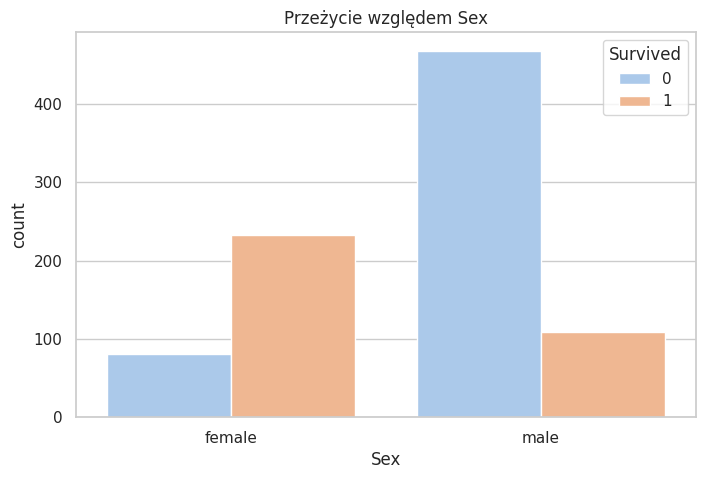

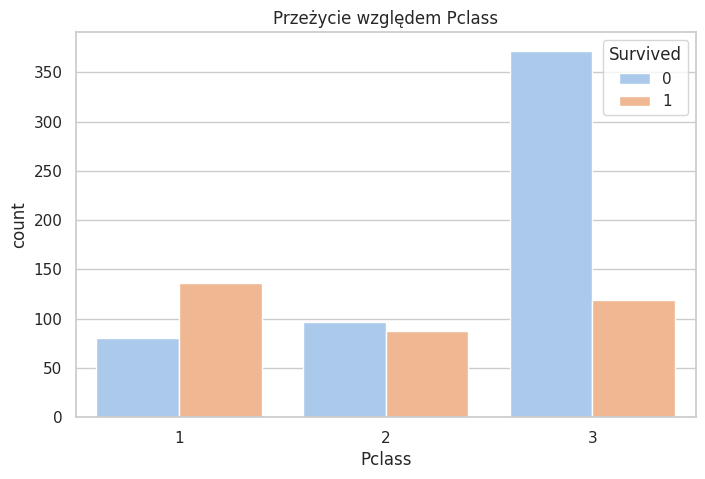

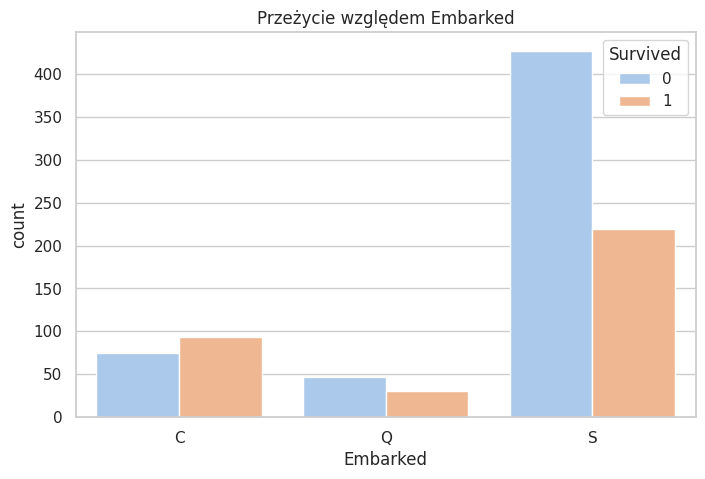

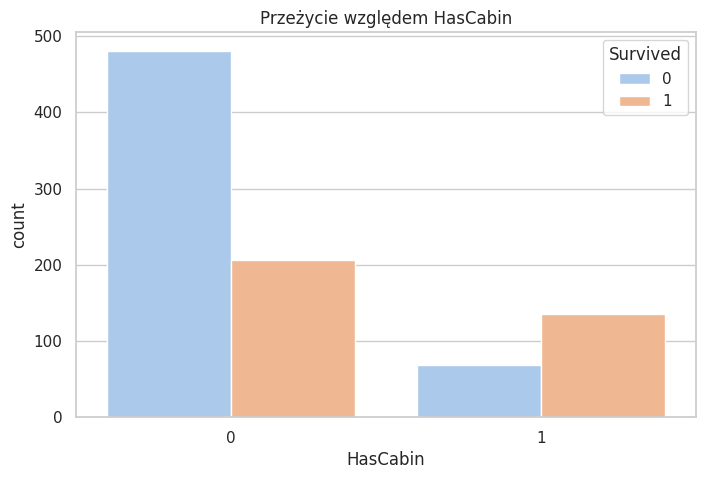

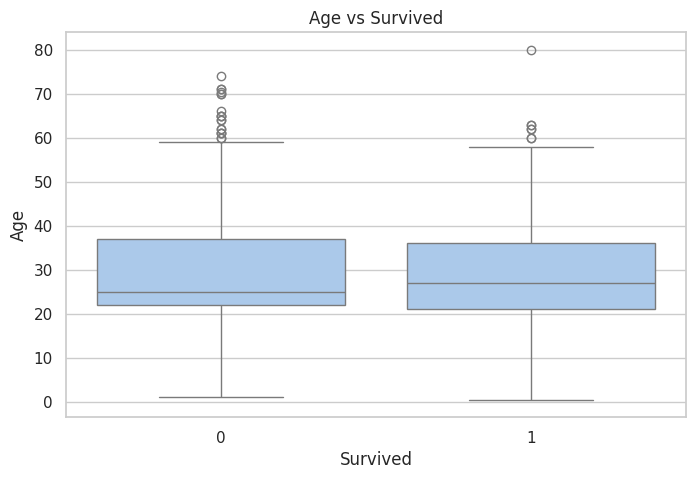

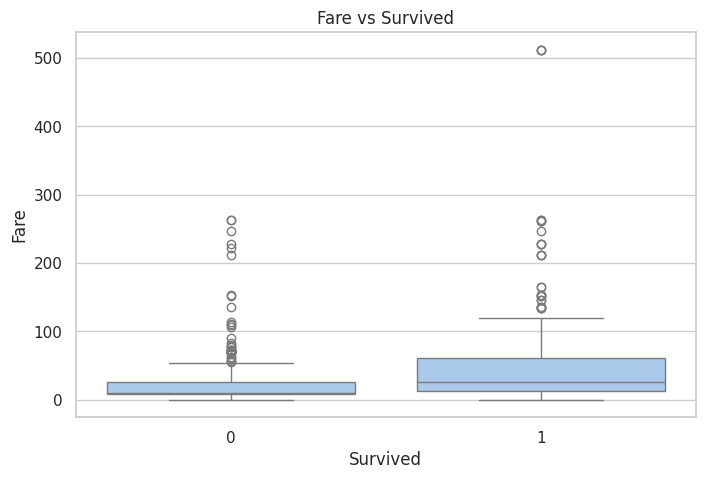

In [72]:
# Zmienna docelowa
sns.countplot(x='Survived', data=df)
plt.title("Rozkład zmiennej docelowej (Survived)")
plt.show()

# Rozkłady numeryczne
num_cols = ['Age', 'Fare']
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Rozkład {col}")
    plt.show()

# Rozkład Survived względem cech kategorycznych
cat_cols = ['Sex', 'Pclass', 'Embarked', 'HasCabin']
for col in cat_cols:
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f"Przeżycie względem {col}")
    plt.show()

# Boxploty dla numerycznych względem Survived
for col in num_cols:
    sns.boxplot(x='Survived', y=col, data=df)
    plt.title(f"{col} vs Survived")
    plt.show()

5. Nowe kolumny

In [73]:
# Tytuł z imienia i nazwiska
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Grupowanie rzadkich tytułów
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Wielkość rodziny
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

6. Cechy kategoryczne

In [74]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

7. Obróbka wartości odstających

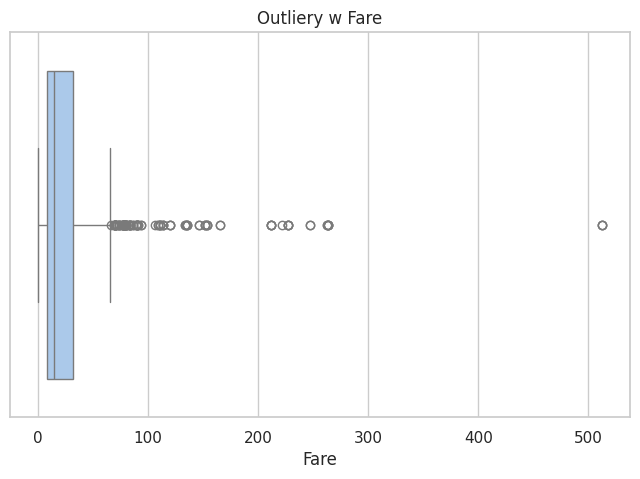

In [75]:
# Boxplot Fare
sns.boxplot(x=df['Fare'])
plt.title("Outliery w Fare")
plt.show()

# Log-transform dla Fare
df['Fare'] = np.log1p(df['Fare'])

8. Finalizacja zbioru

In [76]:
# Usunięcie niepotrzebnych kolumn tekstowych
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Sprawdzenie braków
print("Braki po czyszczeniu:\n", df.isnull().sum())

# Finalny zapis
df.to_csv("titanic_clean.csv", index=False)
print("Zapisano oczyszczony zbiór: titanic_clean.csv")

Braki po czyszczeniu:
 Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare          98
HasCabin       0
FamilySize     0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Title_Miss     0
Title_Mr       0
Title_Mrs      0
Title_Rare     0
dtype: int64
Zapisano oczyszczony zbiór: titanic_clean.csv
